In [3]:
import pandas as pd


In [4]:
df = pd.read_json('news_dataset (1).json')
df.head()

,text,category
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS
3,This Richard Sherman Interception Literally Sh...,SPORTS
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS


In [5]:
df.shape

(7500, 2)

In [6]:
df['category'].value_counts()

category
CRIME       2500
SPORTS      2500
BUSINESS    2500
Name: count, dtype: int64

In [7]:
df['label_num'] = df['category'].map({'CRIME' : 0, 'SPORTS' : 1, 'BUSINESS' : 2})
df.sample(7)

,text,category,label_num
6928,Patriots QB Tom Brady After Super Bowl Loss: '...,SPORTS,1
7169,Mom Faces 15 More Years In Prison For Failing ...,CRIME,0
7285,Suit Accuses Milwaukee Sheriff Of Abuse Of Pow...,CRIME,0
5204,Is It Better To Buy Or Rent?,BUSINESS,2
1406,'Living Wills' For Five Big Banks Fail U.S. Re...,BUSINESS,2
2144,"NYPD Releases 911 Transcripts, Footage Of Sahe...",CRIME,0
3360,Ex-Mayor Kills Wife In 'Final Act Of Love',CRIME,0


In [8]:
import spacy

nlp = spacy.load("en_core_web_lg")

def preprocess(text):
    doc = nlp(text)
    
    filtered_tokens = []
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)
    

In [9]:
df['preprocessed_text'] = df['text'].apply(lambda text : preprocess(text))

In [10]:
df.sample(7)

,text,category,label_num,preprocessed_text
1550,Mercy Over Vengeance for Dzhokhar Tsarnaev We ...,CRIME,0,mercy Vengeance Dzhokhar Tsarnaev Boston Stron...
2516,Ravens Take Out Rival Steelers In Playoff Grud...,SPORTS,1,raven rival Steelers Playoff Grudge Match
859,Drunk Man Incites Panic After Jumping On Bar A...,CRIME,0,drunk man Incites Panic jump Bar praise Allah ...
1495,911 Call: Police Chief Tries To Explain How He...,CRIME,0,911 Police chief try explain shot wife
7094,"Children's Bodies Found In Freezer, Mother Arr...",CRIME,0,child body find Freezer Mother arrest
6865,Is Your Business Ready for the World's Emergin...,BUSINESS,2,business Ready World emerge Middle Class time ...
5959,This PSA Will Be The First To Address Domestic...,SPORTS,1,PSA address Domestic violence Super Bowl hard ...


In [11]:
df['vector'] = df['preprocessed_text'].apply(lambda text : nlp(text).vector)

In [12]:
df.sample(7)

,text,category,label_num,preprocessed_text,vector
3557,Drunk Driver Found Hiding In Nativity Scene Af...,CRIME,0,Drunk Driver Found hide Nativity Scene crash c...,"[1.0297555, 0.90865594, -0.3592547, 0.18292865..."
5636,Mississippi Defeats Oklahoma State 48-20 In Su...,SPORTS,1,Mississippi defeat Oklahoma State 48 20 Sugar ...,"[-1.7397544, -0.6148272, 0.19426133, 0.9116609..."
4716,Killing Spree Ends In Deadly Motel Standoff Su...,CRIME,0,kill Spree Ends Deadly Motel Standoff suspect ...,"[-1.8924774, -0.44492227, -2.359817, 0.2332677..."
3713,Bethany Hamilton Pulls Off Huge Upset In Fiji ...,SPORTS,1,Bethany Hamilton pull Huge Upset Fiji Surf Com...,"[0.027386606, 0.28375313, -0.62683934, -0.2921..."
6793,"New York Giants Clean House, Fire Coach Ben Mc...",SPORTS,1,New York Giants Clean House Fire Coach Ben McA...,"[-1.3931675, 0.97714186, 0.24648996, 2.6994827..."
6515,United Airlines Defends Right To Block Girls I...,BUSINESS,2,United Airlines defend Right block girl leggin...,"[-0.47782472, 1.4337555, -0.97270954, -0.44647..."
7372,President Mistakes 'Jeffersons' For Sanford & ...,CRIME,0,President mistake jefferson Sanford Sons crime...,"[-1.001601, -0.610992, -1.3284991, 0.91564685,..."


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.vector.values, df.label_num, test_size = 0.2, random_state = 0, stratify = df.label_num)

In [14]:
import numpy as np

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

print("Shape of X_train_2d:", X_train_2d.shape)
print("Shape of X_test_2d:", X_test_2d.shape)

# We can see that shape is changed after stacking into 2 dimension

Shape of X_train: (6000,)
Shape of X_test: (1500,)
Shape of X_train_2d: (6000, 300)
Shape of X_test_2d: (1500, 300)


In [15]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train_2d, y_train)

y_pred = clf.predict(X_test_2d)

print(classification_report(y_test, y_pred)) # It not performace good

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       500
           1       0.68      0.67      0.68       500
           2       0.74      0.71      0.72       500

    accuracy                           0.70      1500
   macro avg       0.70      0.70      0.70      1500
weighted avg       0.70      0.70      0.70      1500



In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler # We need to scale our values into positive range 

sc = MinMaxScaler()
scaled_train_embed = sc.fit_transform(X_train_2d)
scaled_test_embed = sc.transform(X_test_2d)

scaled_train_embed

array([[0.47060537, 0.6310417 , 0.4864019 , ..., 0.4436961 , 0.3995322 ,
        0.4833013 ],
       [0.27514285, 0.58155274, 0.5677416 , ..., 0.5328328 , 0.7313219 ,
        0.4171639 ],
       [0.4474647 , 0.52827746, 0.7317188 , ..., 0.2778678 , 0.5085933 ,
        0.5528551 ],
       ...,
       [0.68387926, 0.57122296, 0.6929968 , ..., 0.5206609 , 0.46906167,
        0.48677352],
       [0.4679039 , 0.5237271 , 0.6746307 , ..., 0.33384436, 0.48794493,
        0.40904918],
       [0.40028498, 0.35901105, 0.5818153 , ..., 0.42283002, 0.65643877,
        0.4298824 ]], dtype=float32)

In [17]:
clf = MultinomialNB()

clf.fit(scaled_train_embed, y_train)

y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred)) # Now we can see improvement in perforamnce

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       500
           1       0.86      0.77      0.81       500
           2       0.79      0.84      0.81       500

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500



In [18]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

clf.fit(X_train_2d, y_train)

y_pred = clf.predict(X_test_2d)

print(classification_report(y_test, y_pred)) # With KNN we can see even better performance

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       500
           1       0.91      0.82      0.86       500
           2       0.90      0.84      0.87       500

    accuracy                           0.86      1500
   macro avg       0.87      0.86      0.86      1500
weighted avg       0.87      0.86      0.86      1500



In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train_2d, y_train)

y_pred = clf.predict(X_test_2d)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       500
           1       0.88      0.85      0.86       500
           2       0.88      0.86      0.87       500

    accuracy                           0.87      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.87      0.87      0.87      1500



In [20]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

clf.fit(X_train_2d, y_train)

y_pred = clf.predict(X_test_2d)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       500
           1       0.90      0.87      0.89       500
           2       0.90      0.89      0.90       500

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500



In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[457,  23,  20],
       [ 36, 437,  27],
       [ 28,  25, 447]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

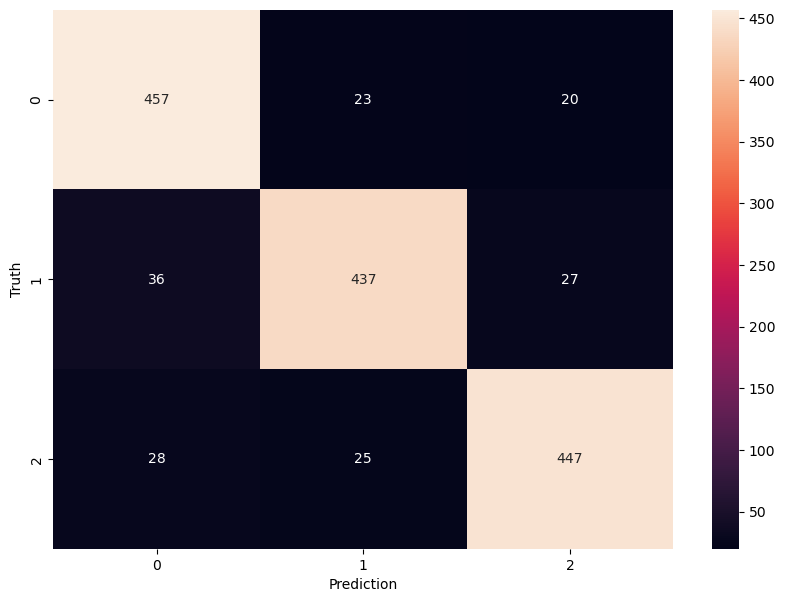

In [22]:
from matplotlib import pyplot as plt
import seaborn as sn

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Truth')